# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [128]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#Display full table width
pd.set_option('display.expand_frame_repr', False)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")


## Loading Data

In [129]:
# Load data
data_train = pd.read_csv("..data/ReneWind_Train.csv")
data_test = pd.read_csv("..data/ReneWind_Test.csv")

In [130]:
# Make sure data was loaded correctly for Training dataset
data_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [131]:
# Make sure data was loaded correctly for Testing dataset
data_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


**Let's check the shape of the dataset for both training and testing**

In [132]:
# Print the shape of the Train dataset
print('Total number of rows in the Training dataset: ',data_train.shape[0])
print('Total number of columns in the Training dataset: ',data_train.shape[1], '\n')

Total number of rows in the Training dataset:  20000
Total number of columns in the Training dataset:  41 



In [133]:
# Print the shape of the Testing dataset
print('Total number of rows in the Testing dataset: ',data_test.shape[0])
print('Total number of columns in the Testing dataset: ',data_test.shape[1], '\n')

Total number of rows in the Testing dataset:  5000
Total number of columns in the Testing dataset:  41 



**We can also check if either of the datasets have missing values**

In [134]:
#Print the number of missing values in the Traing Dataset
print(f'Number of missing values for each column in Training dataset:\n{data_train.isnull().sum()}')

Number of missing values for each column in Training dataset:
V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64


In [135]:
#Print the number of missing values in the Test Dataset
print(f'Number of missing values for each column in Testing dataset:\n{data_test.isnull().sum()}')

Number of missing values for each column in Testing dataset:
V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64


**Observation**
* Both train and test dataset has 41 columns
* Training dataset has 20000 row while the testing dataset has 5000 rows as expected
* Both training and testing dataset are missing values in column V1 and V2. Training set is missing in 18 records for both V1 and V2 while Testing set is missing 5 and 6 rows in respectively

## Data Overview
- Observations
- Sanity checks 

We will do a quick exploration of the Training dataset, checking the shape, columns, datatypes, missing values, duplicates etc.

In [136]:
#Let's print number of rows, columns and dataypes
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

**Observation**
* The dataset has 20K rows and 41 columns
* All 41 columns are of numeric types, including the Target variable. There is no categorical column in the dataset
* Only the first two columns, V1 and V2 are missing values. Rest of the columns have all the rows populated
* We do not have definitions for any of the columns as all the column names are encoded. This will make it difficult for us to do any meaningful Bivariate Analysis or Feature Engineering

**Before doing further analysis, let's create a copy of the training and testing data**

In [137]:
#Let's create a new copy of the training data
df = data_train.copy()
#Let's print out the new dataframe for a quick look
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [138]:
#Let's create a new copy of the testing data
df_test = data_test.copy()
#Let's print out the new dataframe for a quick look
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


**Let's drop duplicate rows if exists**

In [139]:
# checking for duplicate values
print('Number of duplicate records in the dataset: ',df.duplicated().sum())

Number of duplicate records in the dataset:  0


**Summary Statictics**

In [140]:
# Summary of Datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


**Observation**
* None of the columns have a large range of values
* From Target variable mean, it seems the dataset is imbalanced with more 0 than 1 as value
* A lot of columns have a minimum value in the negative

## EDA

### Plotting histograms and boxplots for all the variables

In [141]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [142]:
# function to create labeled barplots


def labeled_barplot(data, feature, show_percent=False, top_n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    show_percent: whether to display percentages instead of count (default is False)
    top_n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if top_n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(top_n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:top_n].sort_values(),)

    for p in ax.patches:
        if show_percent == True:
            label = "{:.3f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

### Generate Historam and Boxplot for all features

Since all columns in this dataset are numeric, we will plot the distribution for all the features at one go

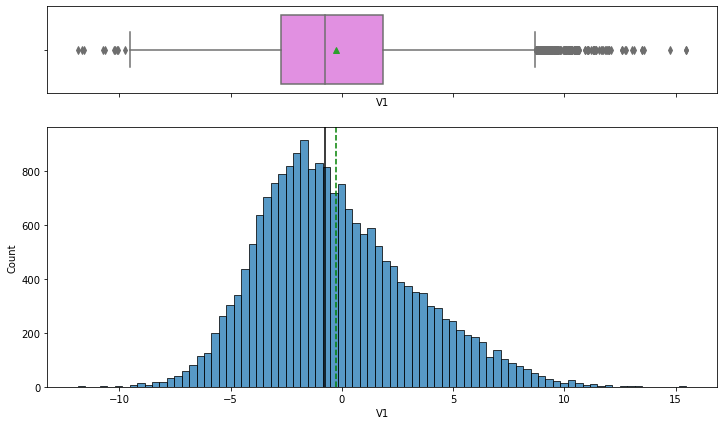

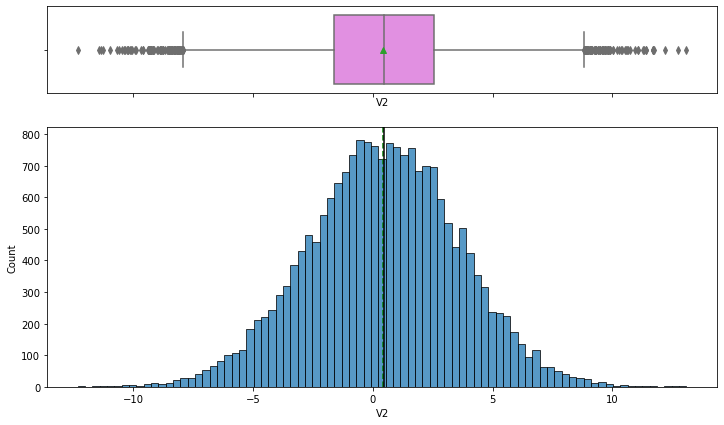

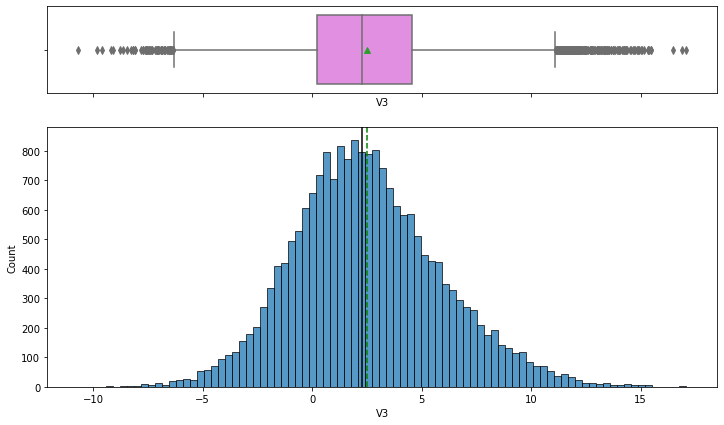

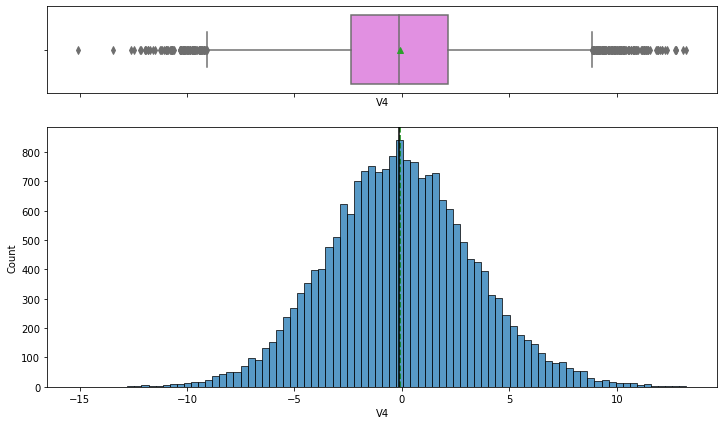

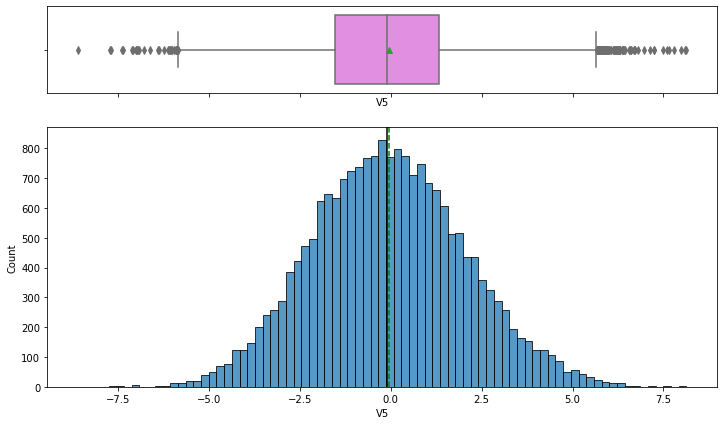

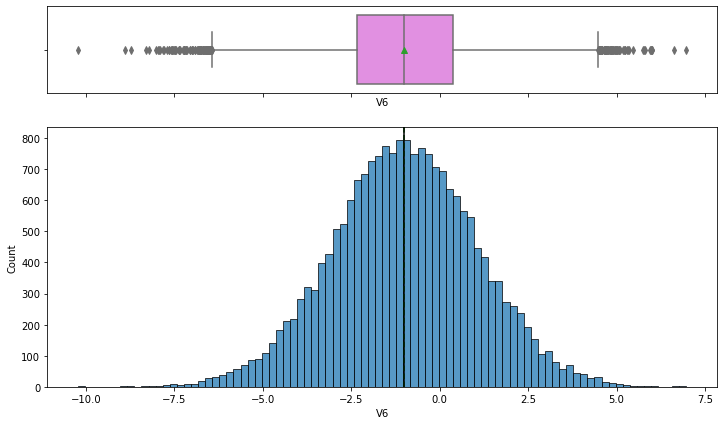

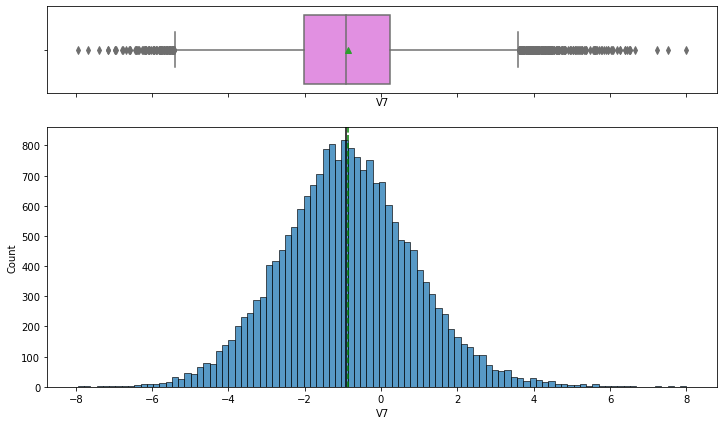

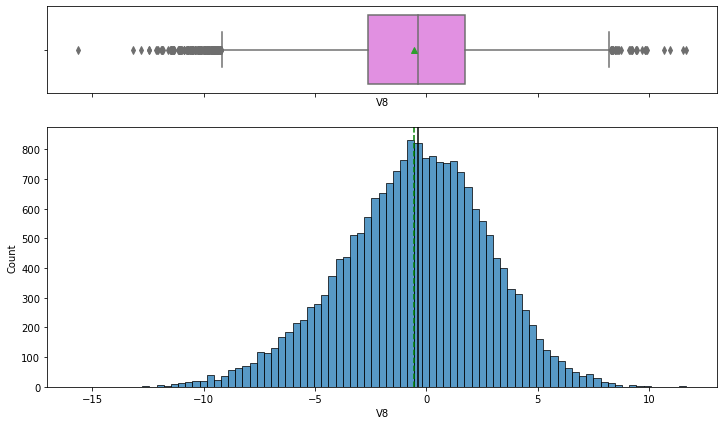

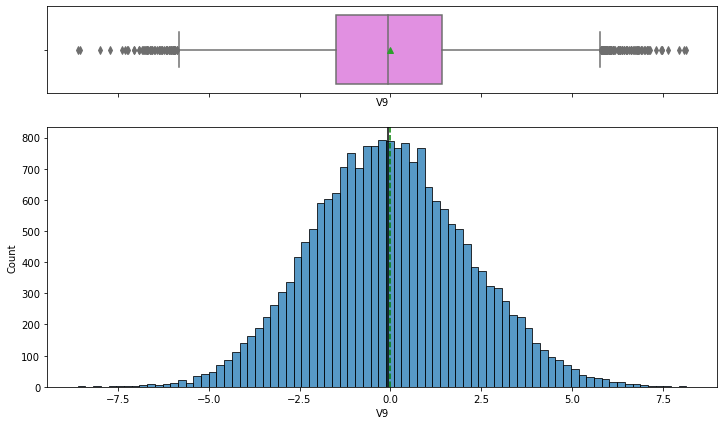

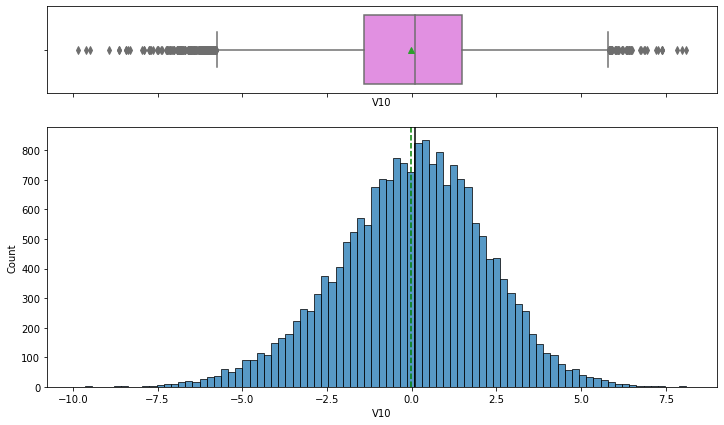

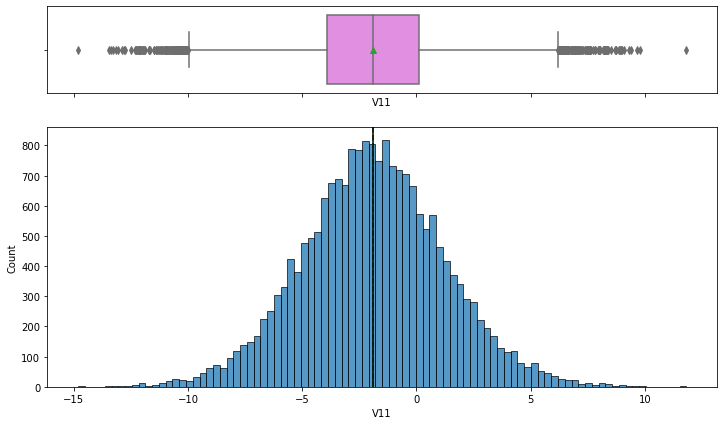

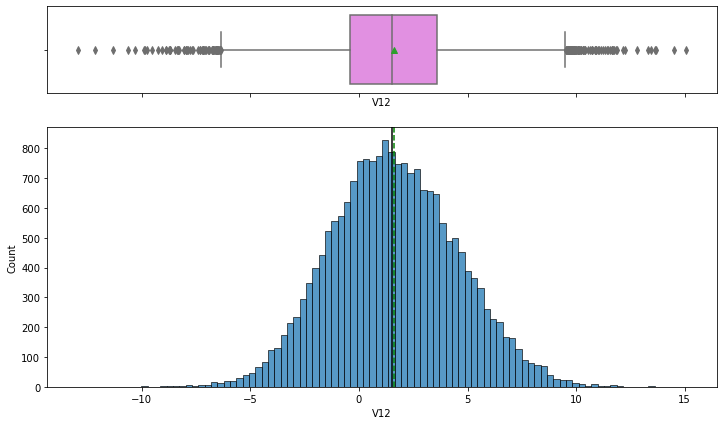

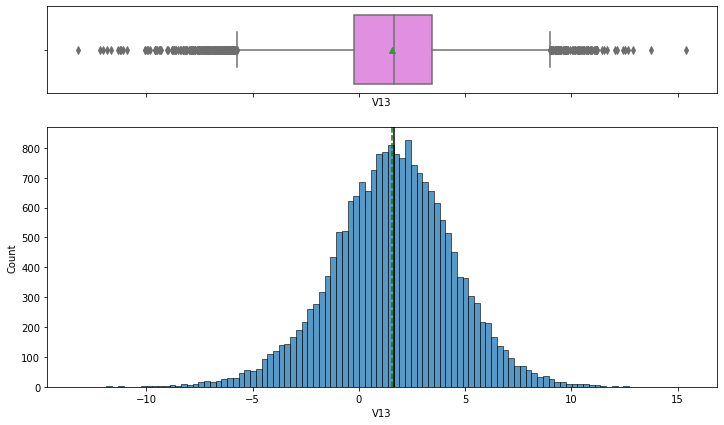

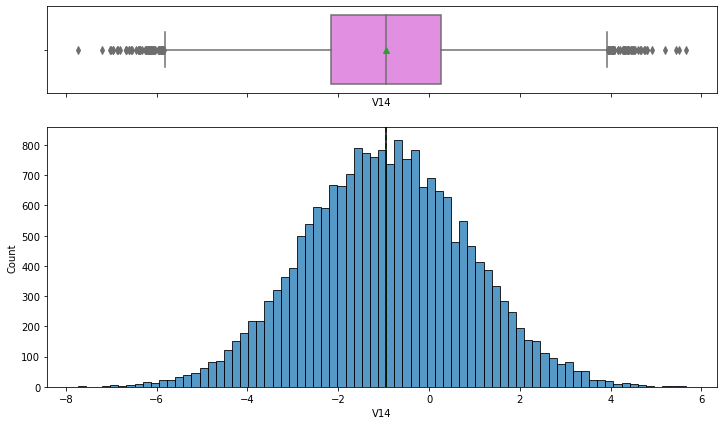

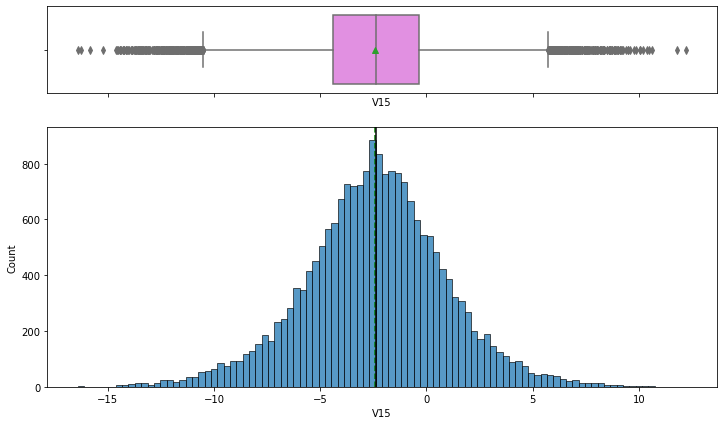

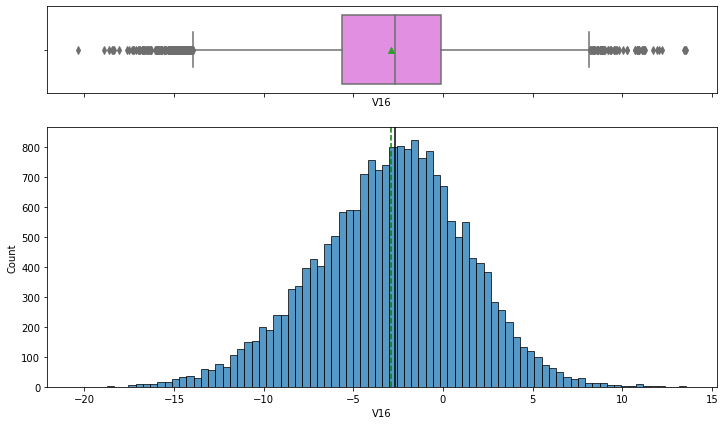

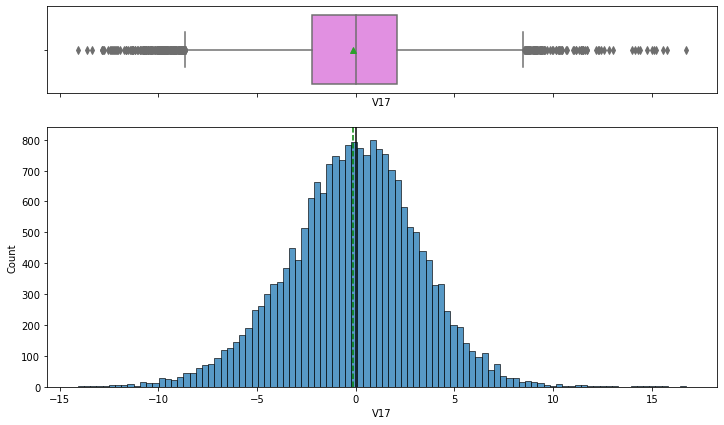

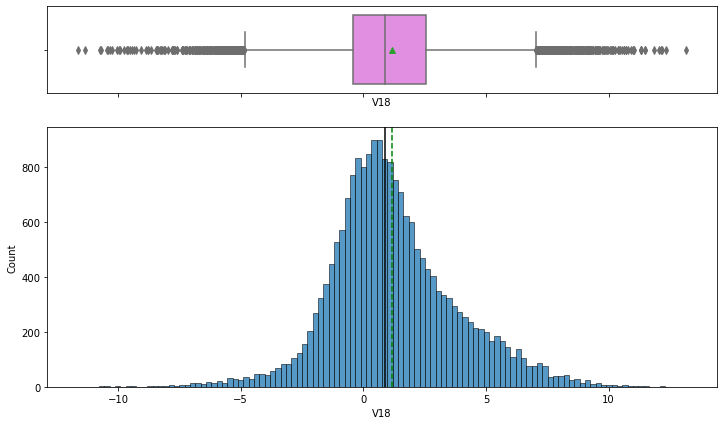

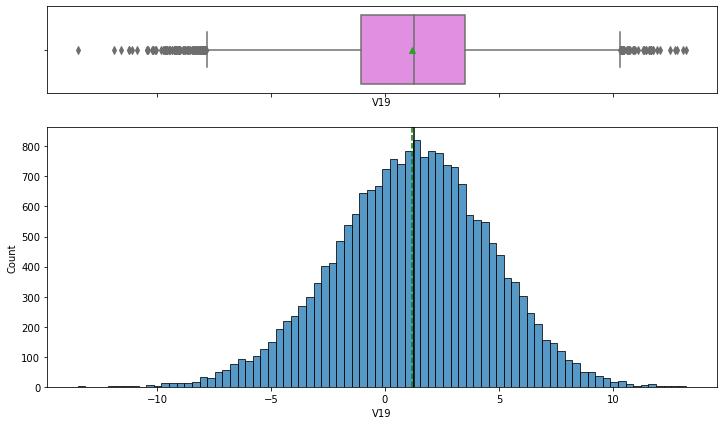

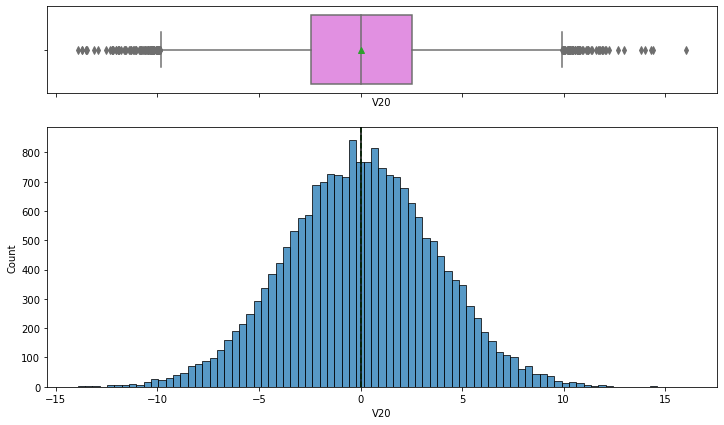

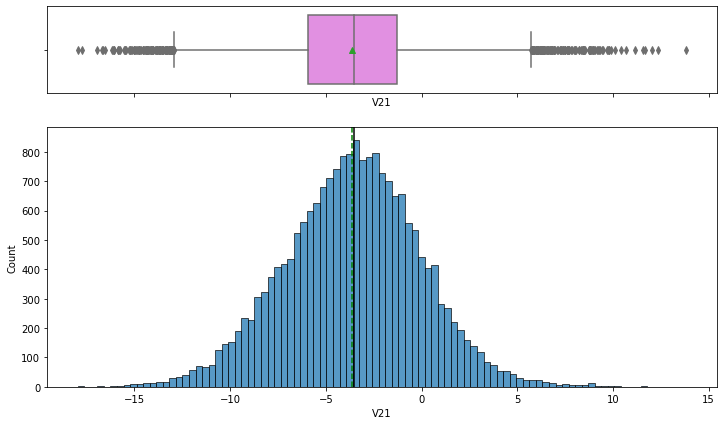

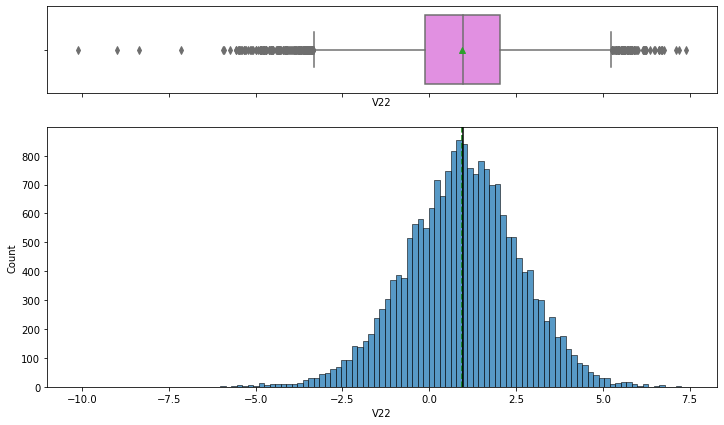

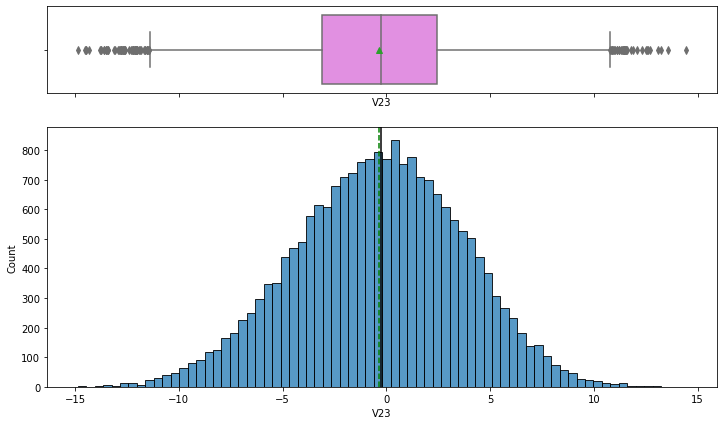

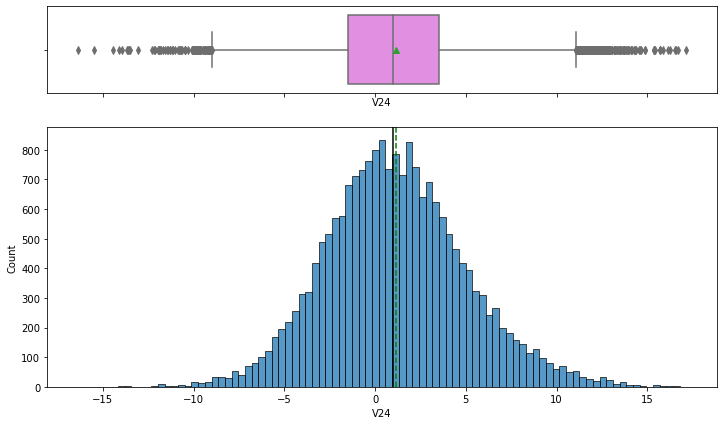

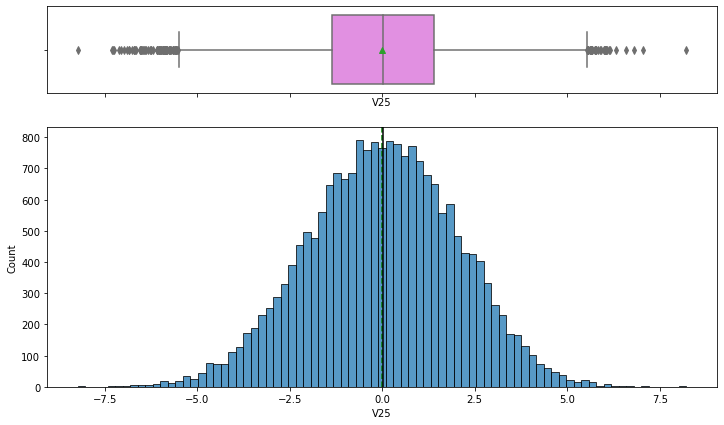

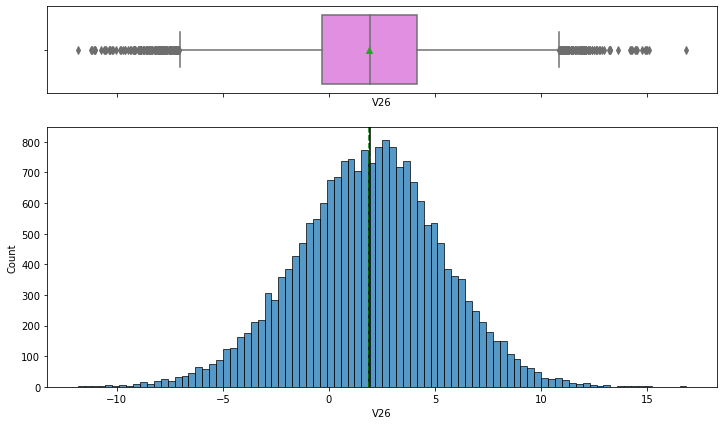

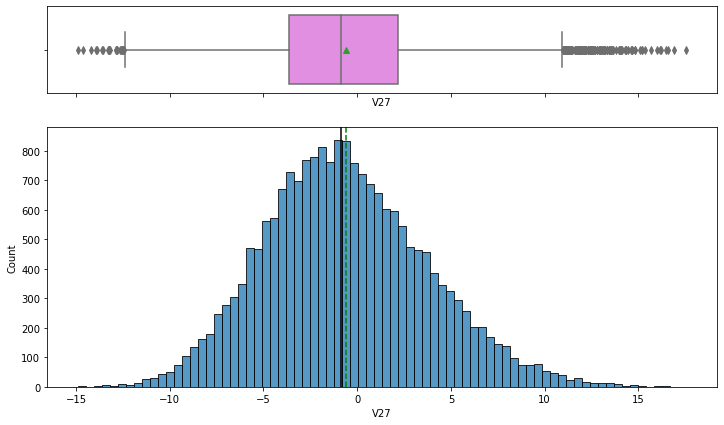

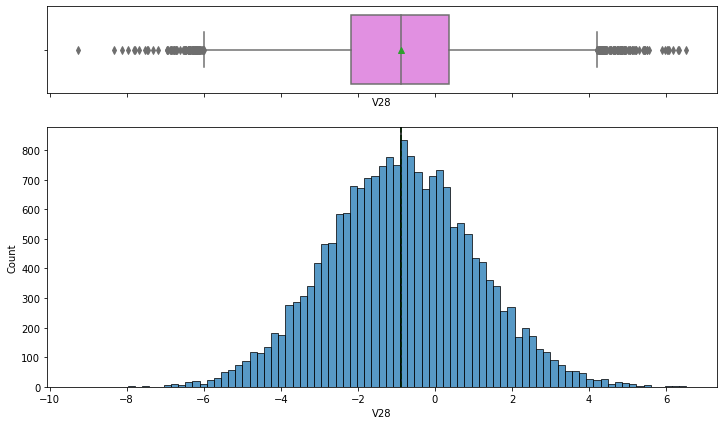

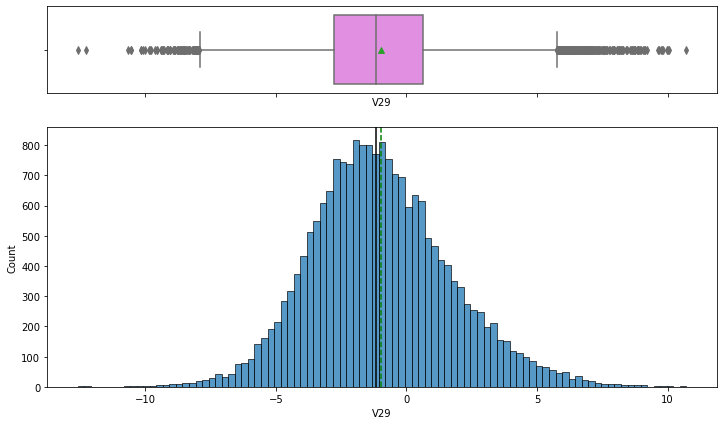

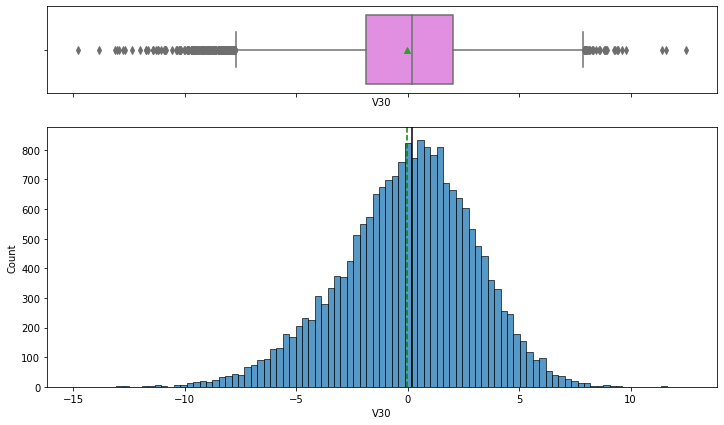

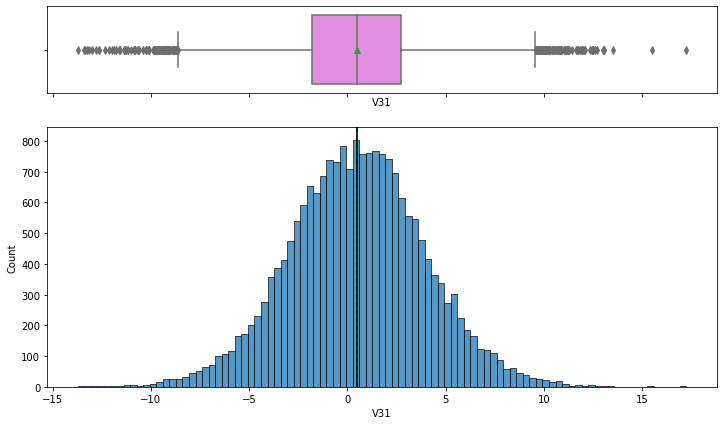

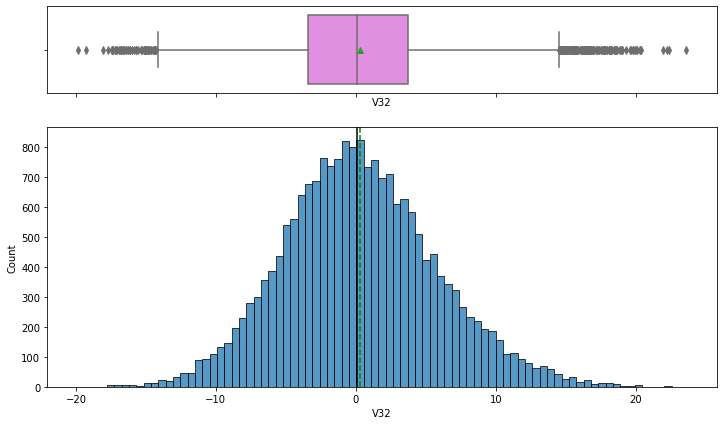

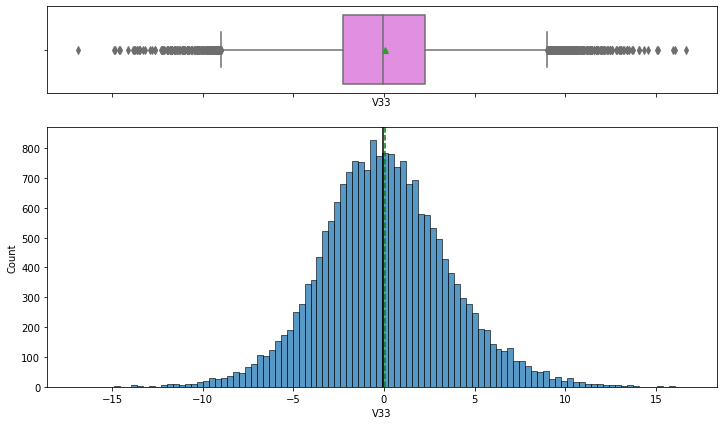

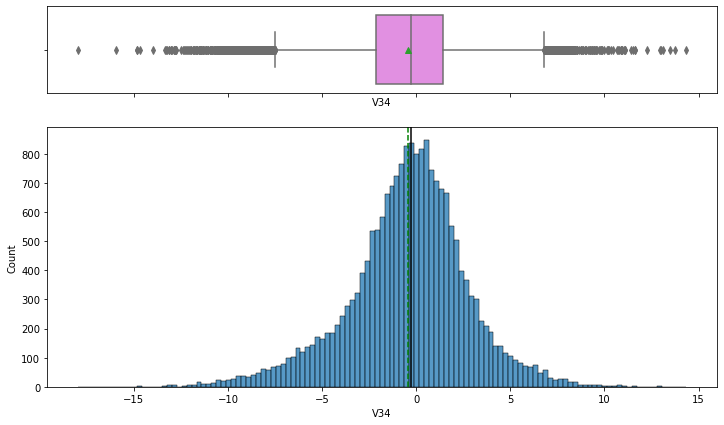

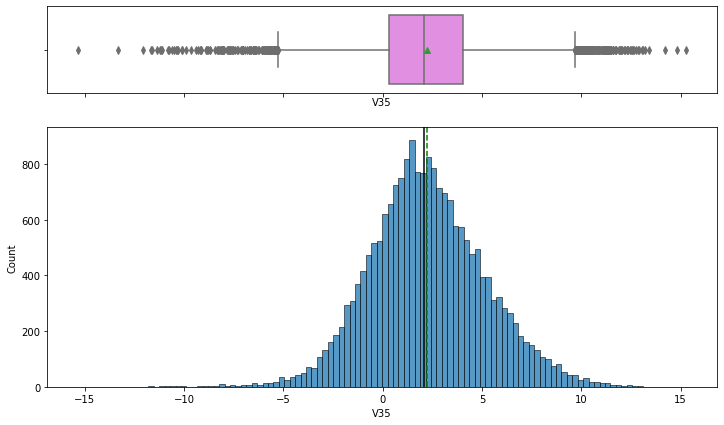

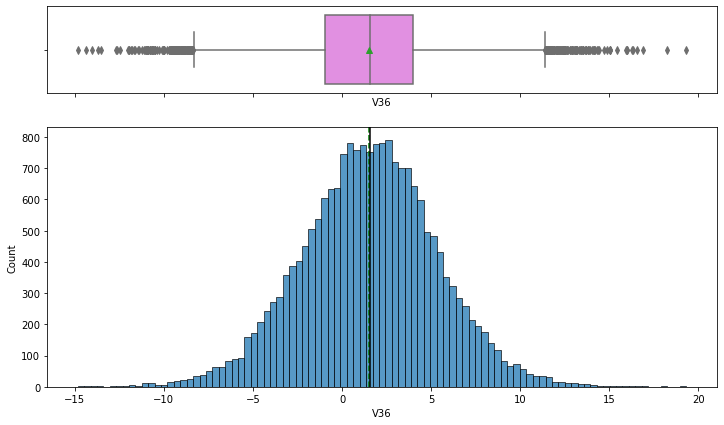

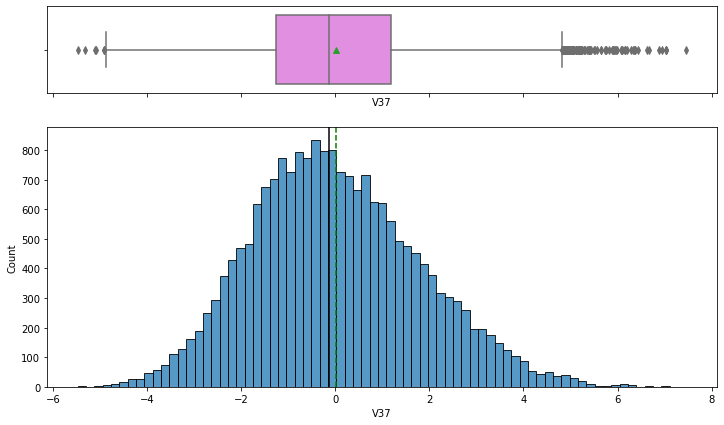

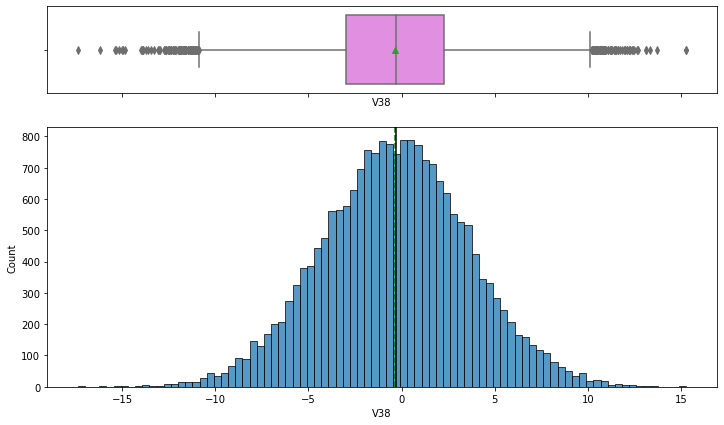

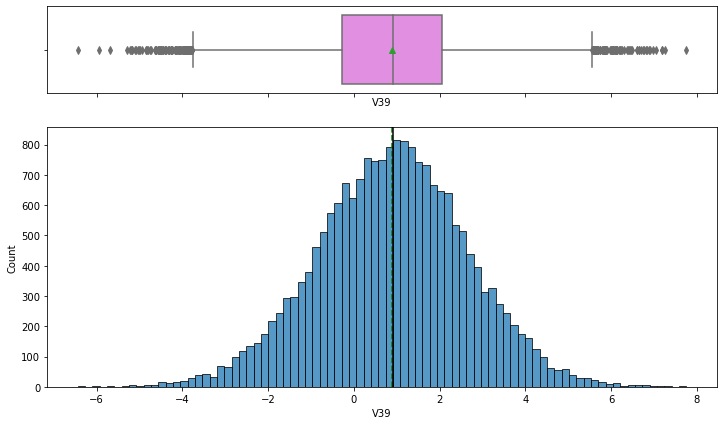

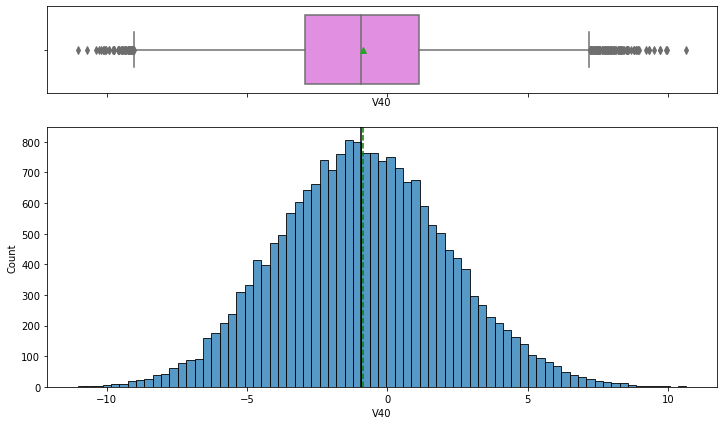

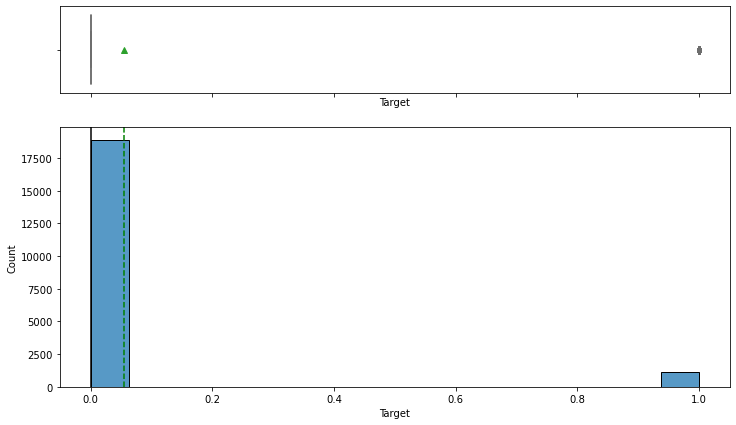

In [143]:
## Call the function to generate histogram and boxplot for every features in the dataset
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) 

**Observation**
* All independent variables either have normal or very close to normal distribution
* We see very slight skewness for a few columns. V30, 26, 17 and 16 is slightly left skewed while V37, 18 and 1 is slightly right skewed
* All independent columns have outliers
* The target variable is clearly imbalanced. We would like to generate a labeled Barplot to get more details on the target variable

#### Observation on `Target`

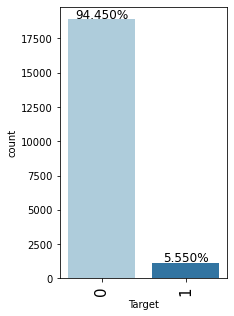

In [144]:
# Let's generate a bar plot for the Target variable for the Training dataset
labeled_barplot(df, 'Target', show_percent=True)

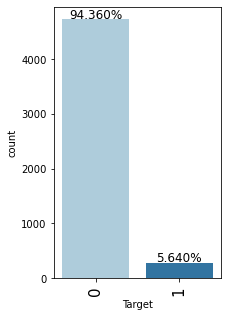

In [145]:
# Let's generate a bar plot for the Target variable for the Testing dataset
labeled_barplot(df_test, 'Target', show_percent=True)

**Observation**
* Both Training and Testing dataset are highly imbalanced. Both has 94% of the rows with 0 and 6% of the rows with 1

### Bivariate Analysis

Since all the columns names are encoded and no explanation or definitions have been provided, we can not do any meaningful Bivraiate analysis. 

However we would still like to generate a heat map and pair plot to see if there are any correlation between any of the variables.

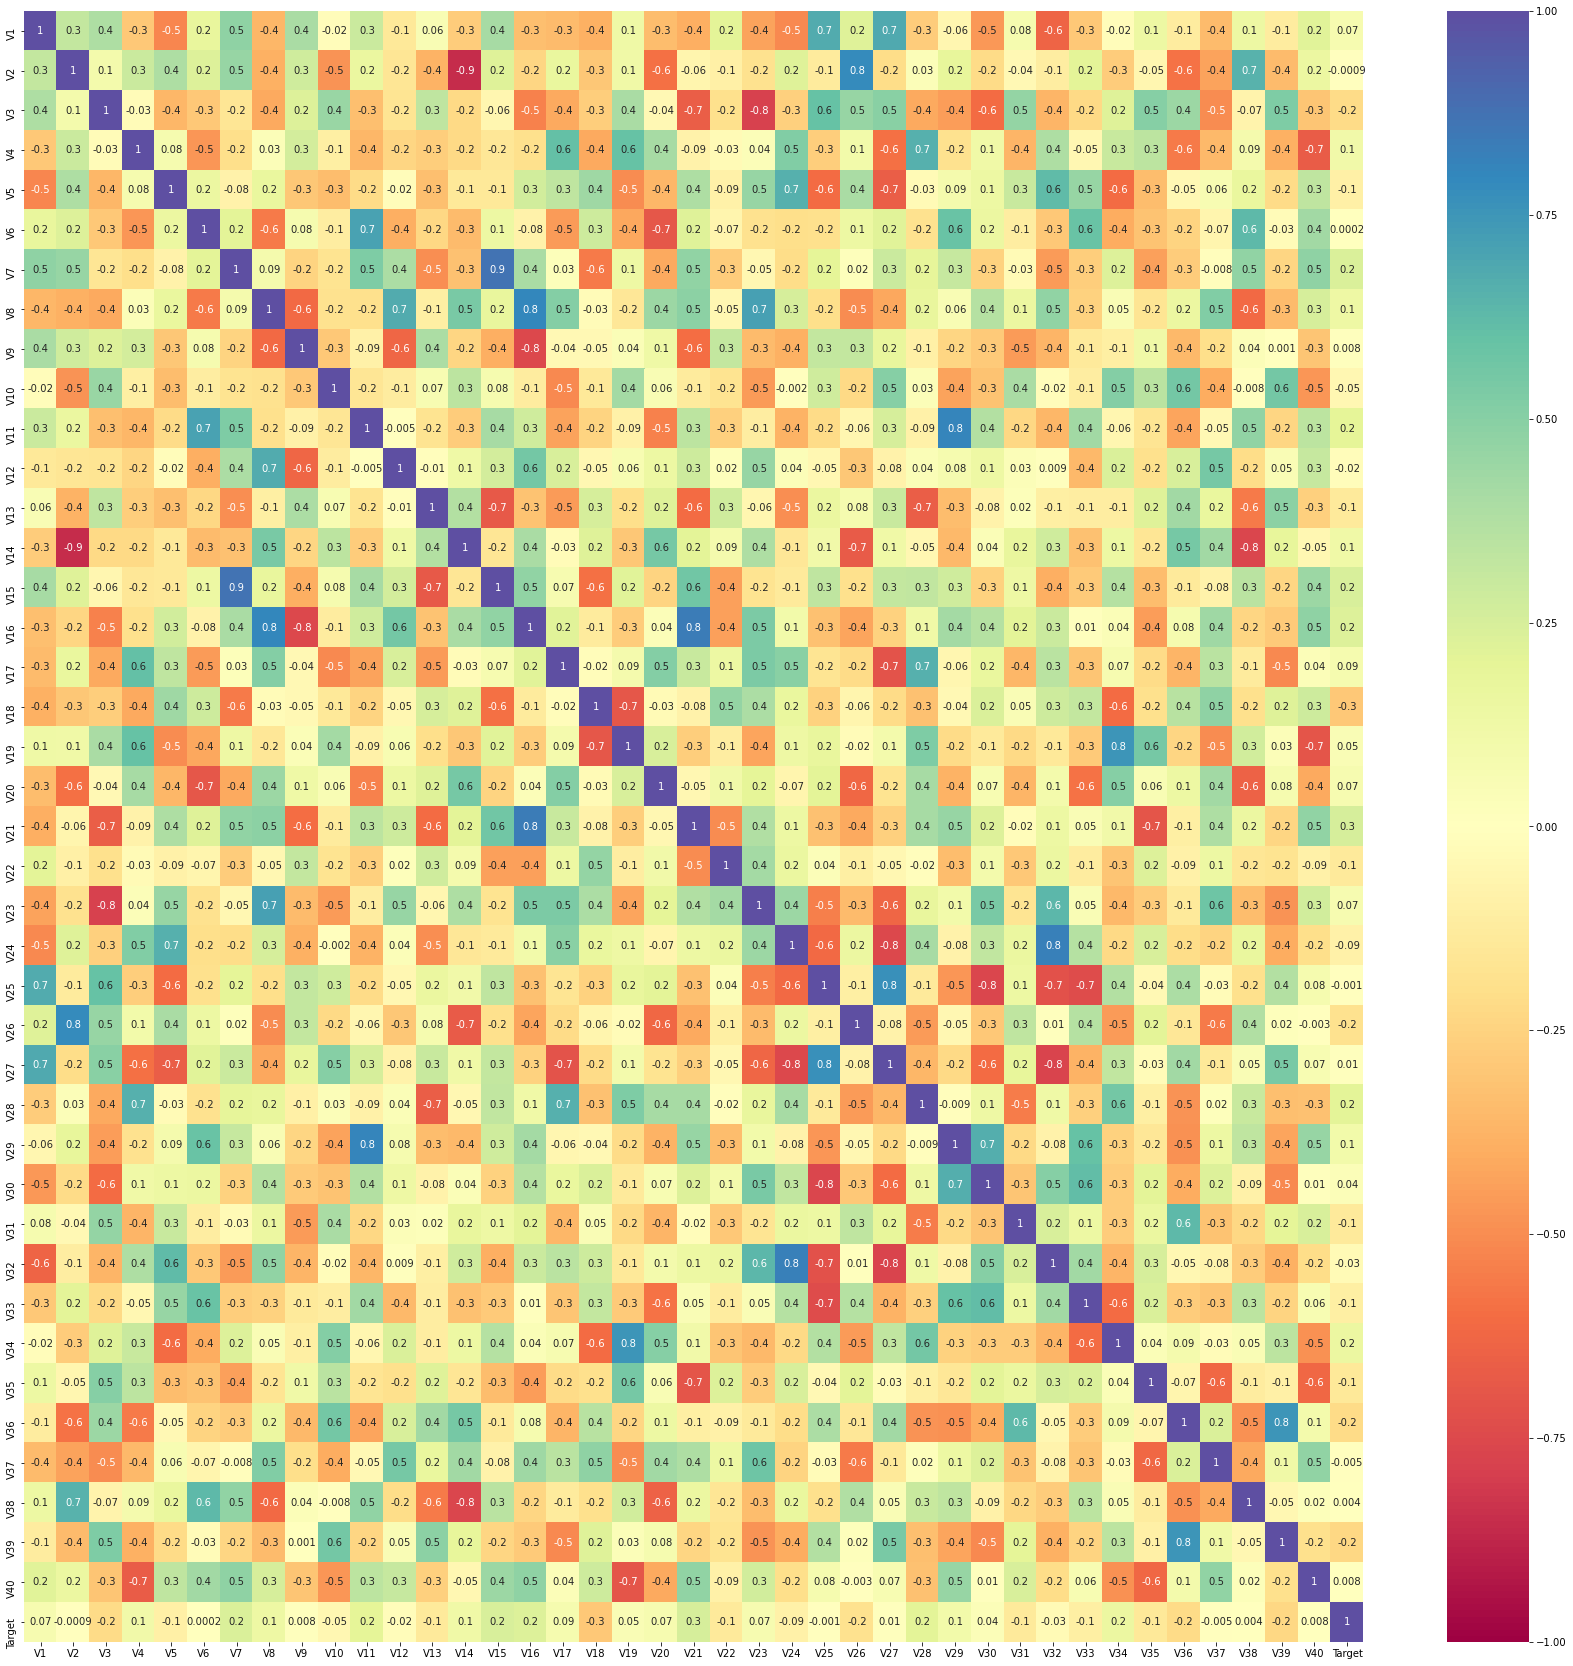

In [146]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

**Observation**
* We do see some very high correlation between different features
* Highest positive correlation exists between column V7 and V15 with a correlation of .9
* Highest negative correlation exists between column V2 and V14 with a correlation of -.9

## Data Pre-processing

### Split Training Data into Training and Validation
* We will be using `stratify` parameter in the train_test_split function to deal with the imbalance in the dataset while splitting it into train and validation set. It ensures that relative class frequencies are approximately preserved in train and test sets. 

In [147]:
X = df.drop(['Target'],axis=1)
y = df['Target']

# Splitting data into training and test set:
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [148]:
print("Shape of Training set : ", X_train.shape)
print("Shape of validation set : ", X_val.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))

Shape of Training set :  (14000, 40)
Shape of validation set :  (6000, 40)
Percentage of classes in training set:
0   0.945
1   0.056
Name: Target, dtype: float64
Percentage of classes in validation set:
0   0.945
1   0.056
Name: Target, dtype: float64


**Separate the Independent and Dependent variables for Test dataset**

In [149]:
X_test = df_test.drop(['Target'],axis=1)
y_test = df_test['Target']

In [150]:
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in Test set:")
print(y_test.value_counts(normalize=True))
print("Percentage of classes in Test set:")
print(y_test.value_counts(normalize=True))

Shape of Test set :  (5000, 40)
Percentage of classes in Test set:
0   0.944
1   0.056
Name: Target, dtype: float64
Percentage of classes in Test set:
0   0.944
1   0.056
Name: Target, dtype: float64


**Observation**

* There is a 94 to 6 ratio between the two classes (1 and 0) for both training and testing datasets. The dataset is imbalanced.
* We will be applying over sampling and under sampling on our training data to build the models
* And based on the result, we will choose the best models to move forward with

### Missing-Value Treatment

* We will use median to impute missing values for any columns with null (V1 and V2). We will impute the median for training, validation and testing sets separately.

In [151]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns) 
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)  
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)  

In [152]:
# Checking that no column has missing values in train or test sets
print('List of Columns with number of missing values in Training Data:')
print(X_train.isna().sum())
print("-" * 30)
print('List of Columns with number of missing values in Validation Data:')
print(X_val.isna().sum())
print("-" * 30)
print('List of Columns with number of missing values in Testing Data:')
print(X_test.isna().sum())

List of Columns with number of missing values in Training Data:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
List of Columns with number of missing values in Validation Data:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
List of Columns with number of missing values in Testing Data:

**Observation**

* None of the datasets have missing values anymore

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [153]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [154]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [155]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building

List of models that will be built with the data

In [156]:
#Create a list of models we will be building
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

### Model Building with original data

Model building with original data 

In [157]:
results_original = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results_original.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.4902481389578163
Bagging: 0.707808105872622
Random forest: 0.7194127377998345
GBM: 0.7220016542597187
Adaboost: 0.6434656741108354
Xgboost: 0.7979487179487179
dtree: 0.7078246484698097

Validation Performance:

Logistic regression: 0.5015015015015015
Bagging: 0.7267267267267268
Random forest: 0.7357357357357357
GBM: 0.7357357357357357
Adaboost: 0.6516516516516516
Xgboost: 0.8198198198198198
dtree: 0.7057057057057057


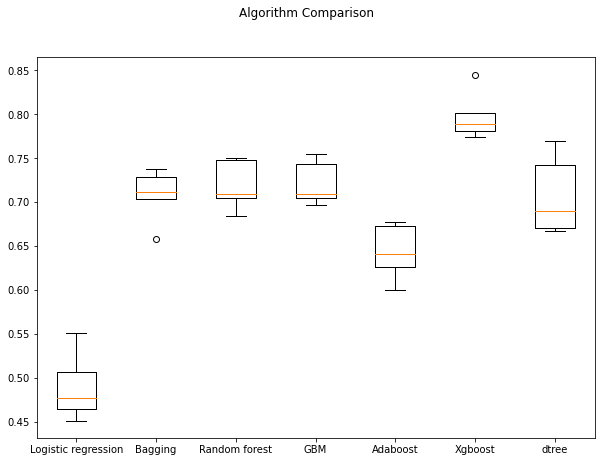

In [158]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_original)
ax.set_xticklabels(names)

plt.show()

**Observation**
* We can see that the XGBoost is giving the highest cross validation performance with a recall score of .81
* The performance score of Random Forest and Gradient Booting are almost the same, followed very closely by Bagging classifier
* Logistic Regression has the lowest performance score
* XGBoost and Bagging models have outliers 
* The performance scores are mostly generalized though they are all on the lower side

We will now try to build the same list of models with oversampled and undersampled data to see if the performance improves

### Model Building with Oversampled data


Let's apply over sampling techniques on the Training dataset

In [159]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [160]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 777
Before OverSampling, count of label '0': 13223 

After OverSampling, count of label '1': 13223
After OverSampling, count of label '0': 13223 

After OverSampling, the shape of train_X: (26446, 40)
After OverSampling, the shape of train_y: (26446,) 



In [161]:
results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.8917044404851445
Bagging: 0.975119441528989
Random forest: 0.9829090368319754
GBM: 0.9329201902370526
Adaboost: 0.904787470436327
Xgboost: 0.9895639018614746
dtree: 0.970128321355339

Validation Performance:

Logistic regression: 0.8498498498498499
Bagging: 0.8258258258258259
Random forest: 0.8558558558558559
GBM: 0.8768768768768769
Adaboost: 0.8618618618618619
Xgboost: 0.8558558558558559
dtree: 0.7837837837837838


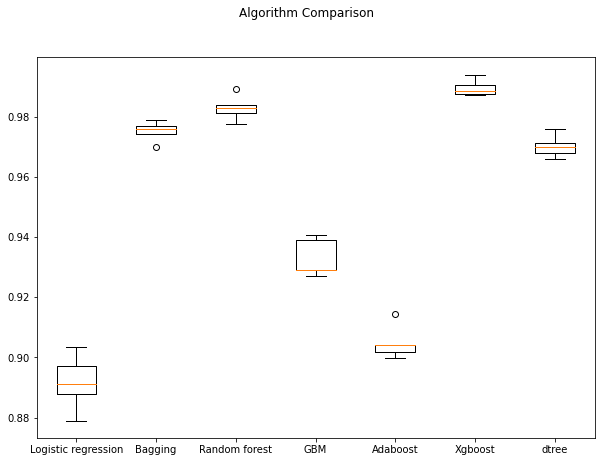

In [162]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

**Observation**
* The performance score improved significantly with over sampled data for all 7 models
* Highest performance score is still from the XGBoost model with a recall score of .98
* It is closely followed by Bagging Classfier and Random Forest models, both with near perfect recall score. Both models however have outliers
* The performance score on validation data also improved significantly and could be considered good
* However they are far below the trainig score. The models where training data is giving a score over .97 have validation score in the mid to high 80. And we see the same pattern for every model
* Therefore the training data is clearly over fitting

### Model Building with Undersampled data

Let's apply under sampling techniques on the Training dataset

In [163]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [164]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 777
Before Under Sampling, count of label '0': 13223 

After Under Sampling, count of label '1': 777
After Under Sampling, count of label '0': 777 

After Under Sampling, the shape of train_X: (1554, 40)
After Under Sampling, the shape of train_y: (1554,) 



In [165]:
results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.8726220016542598
Bagging: 0.880339123242349
Random forest: 0.9034822167080232
GBM: 0.8932009925558313
Adaboost: 0.8725971877584782
Xgboost: 0.897055417700579
dtree: 0.8622167080231596

Validation Performance:

Logistic regression: 0.8468468468468469
Bagging: 0.8708708708708709
Random forest: 0.8828828828828829
GBM: 0.8828828828828829
Adaboost: 0.8588588588588588
Xgboost: 0.8918918918918919
dtree: 0.8408408408408409


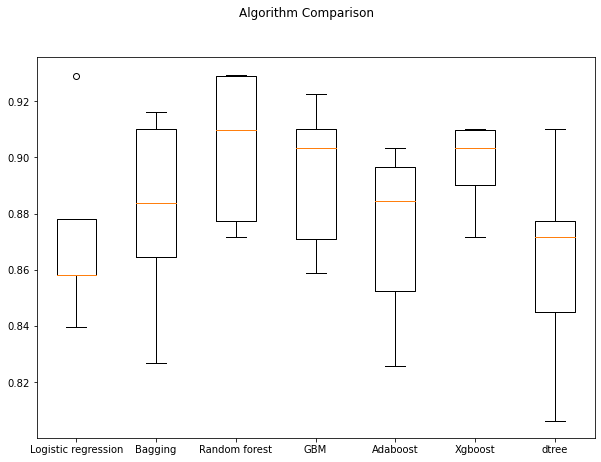

In [166]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names_un)

plt.show()

**Observation**
* The models built with undersampled data is great performance, though the range of performance score is wider than models with over sampled data
* The recall score jumped significantly from the models built with original data, though the training score is not as good as the training scores from the Oversampled models
* The score on validation data is very close to the scores on training data unlike models with over sampled data where the training dataset is clearly over fitting
* All the models for undersampled data is giving generalized performance with recall scores in the mid to high 80s for both training and validation 
* Best model built with under sampled data is still XGboost with a performance score of approaximately .89 in both training and testing data
* XGBoost score is followed by Gradient Boost, Random Forest and Bagging where the performance scores are all in the high 80s and generalized in training and validation datasets


### Models for Hyperparameter Tuning

The models built using over sampled and under sampled data are giving far better results than the models built with original data. The performance score is incredibly good with over sampled data as most scores are above .9 with two of the models giving near perfect recall scores.

However for over sampled data, we do not see the same perfornce on the validation data. Even though the results in validation data is still good and is close to .9 but there is still a big difference. 

Models built using under sampled data on the other hand is giving performance scores in the high .8s and it's giving a generalized result for all 7 models. 

Since the models built using under sampled data is giving high recall score and generalized performance, we will go ahead and tune three of the highest performing models built using under sampled data. 

**XGBoost, GradientBoost, Random Forest and Bagging with Undersampling** 

We will also pick a model from Over sampled data for tuning. We will pick the model where the performance score is still good but the difference between the training and validation score is the least. So we are choosing the Adaboost model from the Oversampled models

**Adaboost with Oversampling**

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## AdaBoost Classifier with Oversampled data

Let's use random search to find the best combination of parameters using AdaBoost Classifier to see if we can improve the recall score

In [167]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid =  { "n_estimators": [100, 150, 200]
               , "learning_rate": [0.2, 0.05]
               , "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1)
               , DecisionTreeClassifier(max_depth=2, random_state=1)
               , DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
ab_classifier_tuned_over = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
print('Best Algorithm')
ab_classifier_tuned_over.fit(X_train_over, y_train_over)

Best Algorithm


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [168]:
#Calculating different metrics
abc_tuned_model_train_over_perf=model_performance_classification_sklearn(ab_classifier_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",abc_tuned_model_train_over_perf)
abc_tuned_model_test_over_perf=model_performance_classification_sklearn(ab_classifier_tuned_over,X_val,y_val)
print("Validation performance:\n",abc_tuned_model_test_over_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.994   0.991      0.997 0.994
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.980   0.847      0.803 0.825


Confusion metrics : Training set


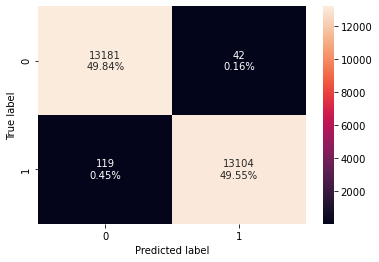

In [169]:
#Creating confusion matrix for the training data
print('Confusion metrics : Training set')
confusion_matrix_sklearn(ab_classifier_tuned_over,X_train_over,y_train_over)

Confusion metrics : Validation set


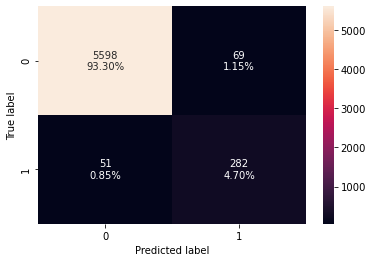

In [170]:
#Creating confusion matrix for the testing data
print('Confusion metrics : Validation set')
confusion_matrix_sklearn(ab_classifier_tuned_over,X_val,y_val)

**Observation**
* We see big performance score improvement in the training data. The recall score went from .90 in default oversampled model to .98 after Hyperparameter Tuning
* But the recall slightly dropped for the validation data
* This also means the difference between the recall score for training and validation increased, indicating that the training data is seriously overfitting

## Random Forest Classifier with undersampled data

Let's use random search to find the best combination of parameters using Random Forest Classifier to see if we can improve the recall score

In [171]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300]
              , "min_samples_leaf": np.arange(1, 4)
              , "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt']
              , "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
rf_tuned_un = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
print('Best Algorithm')
rf_tuned_un.fit(X_train_un, y_train_un)

Best Algorithm


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

In [172]:
#Calculating different metrics
rf_tuned_model_train_un_perf=model_performance_classification_sklearn(rf_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",rf_tuned_model_train_un_perf)
rf_tuned_model_test_un_perf=model_performance_classification_sklearn(rf_tuned_un,X_val,y_val)
print("Validation performance:\n",rf_tuned_model_test_un_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.988   0.978      0.999 0.988
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.934   0.880      0.451 0.597


Confusion metrics : Training set


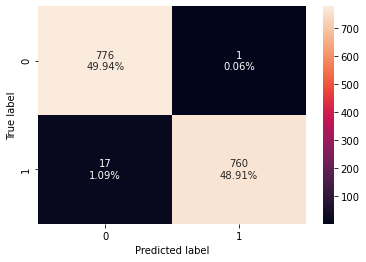

In [173]:
#Creating confusion matrix for the training data
print('Confusion metrics : Training set')
confusion_matrix_sklearn(rf_tuned_un,X_train_un,y_train_un)

Confusion metrics : Validation set


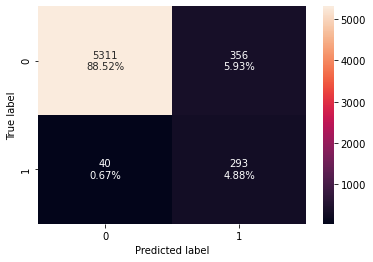

In [174]:
#Creating confusion matrix for the testing data
print('Confusion metrics : Validation set')
confusion_matrix_sklearn(rf_tuned_un,X_val,y_val)

**Observation**
* The performance score improved greatly in the training data but the recall is still the same in the validation data
* This also means the difference between the recall score for training and validation went up, indicating that the training data is now overfitting

## Bagging Classifier with undersampled data

Let's use random search to find the best combination of parameters using Bagging Classifier to see if we can improve the recall score

In [175]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1]
              , 'max_features': [0.7,0.8,0.9]
              , 'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
bagging_estimator_tuned_un = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
print('Best Algorithm')
bagging_estimator_tuned_un.fit(X_train_un, y_train_un)

Best Algorithm


BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [176]:
#Calculating different metrics
bagging_estimator_tuned_model_train_un_perf=model_performance_classification_sklearn(bagging_estimator_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",bagging_estimator_tuned_model_train_un_perf)
bagging_estimator_tuned_model_test_un_perf=model_performance_classification_sklearn(bagging_estimator_tuned_un,X_val,y_val)
print("Validation performance:\n",bagging_estimator_tuned_model_test_un_perf)


Training performance:
    Accuracy  Recall  Precision    F1
0     0.999   0.997      1.000 0.999
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.937   0.874      0.463 0.605


Confusion metrics : Training set


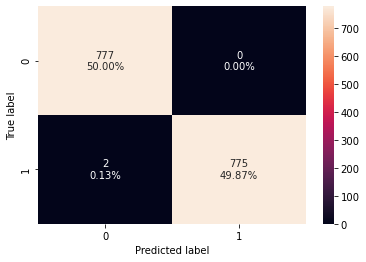

In [177]:
#Creating confusion matrix for the training data
print('Confusion metrics : Training set')
confusion_matrix_sklearn(bagging_estimator_tuned_un,X_train_un,y_train_un)

Confusion metrics : Validation set


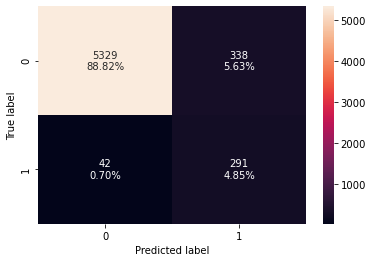

In [178]:
#Creating confusion matrix for the testing data
print('Confusion metrics : Validation set')
confusion_matrix_sklearn(bagging_estimator_tuned_un,X_val,y_val)

**Observation**
* The performance score improved greatly in the training data but the recall is still the same in the validation data
* This also means the difference between the recall score for training and validation went up, indicating that the training data is now overfitting

## Gradient Boosting Classifier with undersampled data

Let's use random search to find the best combination of parameters using Gradient Boosting Classifier to see if we can improve the recall score

In [179]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid =  { "n_estimators": np.arange(100,150,25)
               , "learning_rate": [0.2, 0.05, 1]
               , "subsample":[0.5,0.7]
               , "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
gbc_tuned_un = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
print('Best Algorithm')
gbc_tuned_un.fit(X_train_un, y_train_un)

Best Algorithm


GradientBoostingClassifier(learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [180]:
#Calculating different metrics
gbc_tuned_model_train_un_perf=model_performance_classification_sklearn(gbc_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",gbc_tuned_model_train_un_perf)
gbc_tuned_model_test_un_perf=model_performance_classification_sklearn(gbc_tuned_un,X_val,y_val)
print("Validation performance:\n",gbc_tuned_model_test_un_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.947   0.920      0.973 0.946
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.920   0.871      0.401 0.549


Confusion metrics : Training set


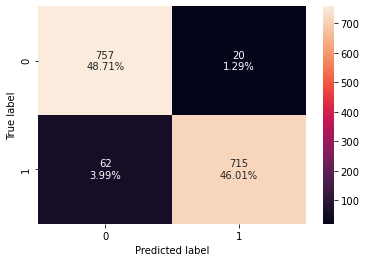

In [181]:
#Creating confusion matrix for the training data
print('Confusion metrics : Training set')
confusion_matrix_sklearn(gbc_tuned_un,X_train_un,y_train_un)

Confusion metrics : Validation set


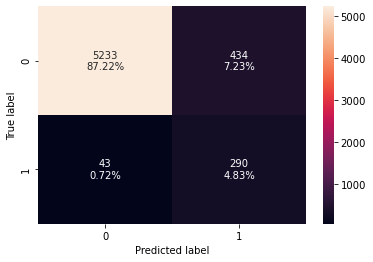

In [182]:
#Creating confusion matrix for the testing data
print('Confusion metrics : Validation set')
confusion_matrix_sklearn(gbc_tuned_un,X_val,y_val)

**Observation**
* The recall score for training data went up from .89 to .92 but the validaiton score dropped slightly from .88 to .87
* The model is slightly over fitting on the training data compare to the default undersampled model

## XGBoost Classifier with undersampled data

Let's use random search to find the best combination of parameters using XGBoost Classifier to see if we can improve the recall score

In [183]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid = { 'n_estimators': [150, 200, 250]
              , 'scale_pos_weight': [5,10]
              , 'learning_rate': [0.1,0.2]
              , 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
xgb_tuned_un = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
print('Best Algorithm')
xgb_tuned_un.fit(X_train_un, y_train_un)

Best Algorithm


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
#Calculating different metrics
xgb_tuned_model_train_un_perf=model_performance_classification_sklearn(xgb_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",xgb_tuned_model_train_un_perf)
xgb_tuned_model_test_un_perf=model_performance_classification_sklearn(xgb_tuned_un,X_val,y_val)
print("Validation performance:\n",xgb_tuned_model_test_un_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.992   1.000      0.985 0.992
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.867   0.904      0.281 0.429


Confusion metrics : Training set


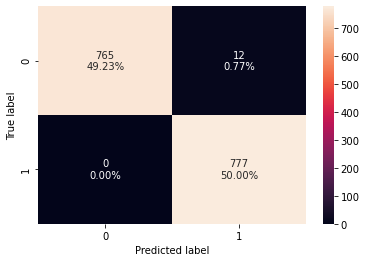

In [185]:
#Creating confusion matrix for the training data
print('Confusion metrics : Training set')
confusion_matrix_sklearn(xgb_tuned_un,X_train_un,y_train_un)

Confusion metrics : Validation set


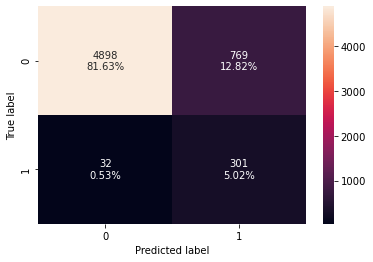

In [186]:
#Creating confusion matrix for the testing data
print('Confusion metrics : Validation set')
confusion_matrix_sklearn(xgb_tuned_un,X_val,y_val)

**Observation**
* The recall score went up significantly for training data, jumping from score of .89 to 1
* However the gain on validation data was little, with the score going from .89 to .9
* This is giving the highest recall score in validation though the training data is clearly over fitting 

## Model performance comparison and choosing the final model

**Training Performance Comparison**

In [187]:
# training performance comparison

models_train_comp_df = pd.concat(
    [abc_tuned_model_train_over_perf.T
     ,rf_tuned_model_train_un_perf.T
     ,bagging_estimator_tuned_model_train_un_perf.T
     ,gbc_tuned_model_train_un_perf.T     
     ,xgb_tuned_model_train_un_perf.T],axis=1,
)
models_train_comp_df.columns = [    
    "AdaBoost Classifier Tuned with Oversampled Data"
    ,"Random Forest Tuned with Undersampled Data"
    ,"Bagging Estimator Tuned with Undersampled Data"
    ,"Gradient Boost Classifier Tuned with Undersampled Data"    
    ,"XGBoost Classifier Tuned with Undersampled Data"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Classifier Tuned with Oversampled Data,Random Forest Tuned with Undersampled Data,Bagging Estimator Tuned with Undersampled Data,Gradient Boost Classifier Tuned with Undersampled Data,XGBoost Classifier Tuned with Undersampled Data
Accuracy,0.994,0.988,0.999,0.947,0.992
Recall,0.991,0.978,0.997,0.920,1.000
Precision,0.997,0.999,1.000,0.973,0.985
F1,0.994,0.988,0.999,0.946,0.992


**Validation Performance Comparison**

In [188]:
# Validation performance comparison

models_test_comp_df = pd.concat(
    [abc_tuned_model_test_over_perf.T
     ,rf_tuned_model_test_un_perf.T
     ,bagging_estimator_tuned_model_test_un_perf.T
     ,gbc_tuned_model_test_un_perf.T     
     ,xgb_tuned_model_test_un_perf.T],axis=1,
)
models_test_comp_df.columns = [    
    "AdaBoost Classifier Tuned with Oversampled Data"
    ,"Random Forest Tuned with Undersampled Data"
    ,"Bagging Estimator Tuned with Undersampled Data"
    ,"Gradient Boost Classifier Tuned with Undersampled Data"    
    ,"XGBoost Classifier Tuned with Undersampled Data"]

print("Validation performance comparison:")
models_test_comp_df

Validation performance comparison:


,AdaBoost Classifier Tuned with Oversampled Data,Random Forest Tuned with Undersampled Data,Bagging Estimator Tuned with Undersampled Data,Gradient Boost Classifier Tuned with Undersampled Data,XGBoost Classifier Tuned with Undersampled Data
Accuracy,0.980,0.934,0.937,0.920,0.867
Recall,0.847,0.880,0.874,0.871,0.904
Precision,0.803,0.451,0.463,0.401,0.281
F1,0.825,0.597,0.605,0.549,0.429


**Observation**
* We see some gain in recall score after doing Hypterparameter tuning for most models except for a few
* However, most of the gain was for training data and very slight improvement was seen in validation recall score
* While the Models built using undersampled data was initially giving good score and generalized performance, after hyperparameter tuning, the traing data started over fitting for all the models
* The lowest score and biggest difference between training and validation data was seen for AdaBoost with Oversampled data with a validation recall score of .84
* The highest recall score was given by the XGBoost Classifier where the recall score in training is 1 and validation is .90
* The tuned Gradient Boost, Bagging and Random Forest using undersampled data also had similar performance score in validation data with score of .87, .87 and .88 respectively
* Since all models are over fitting on training data, we will pick the model with the highest recall score 

**Therefore we will choose the Tuned XGBoost model with Undersampled data as our final model**

### Test set final performance

In [189]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned_un, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.862,0.894,0.276,0.421


**Observation**
* The recall score in the test set slightly dropped to .89
* However recall score on test data is still close to the validation score
* Overall it's giving great result on both validation and test data. So overall it should have good performance in production

### Feature Importance

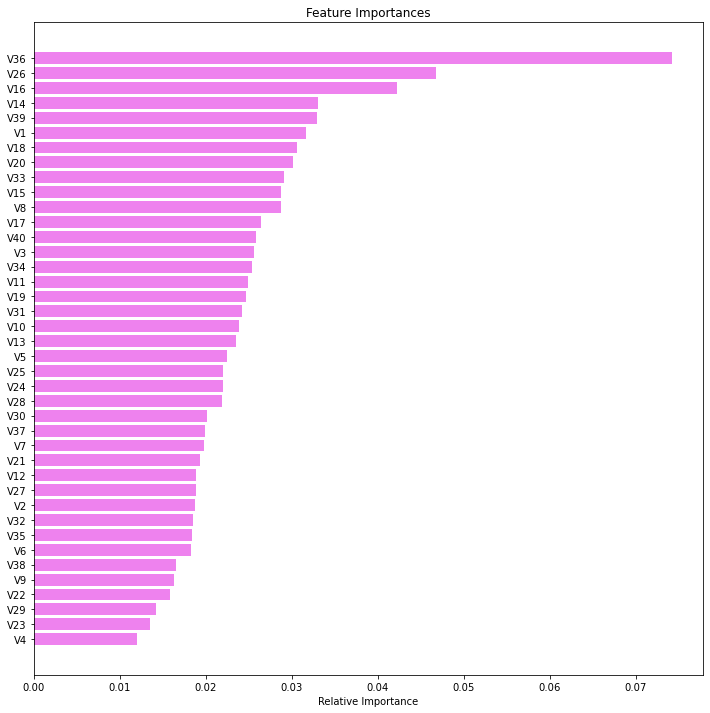

In [190]:
feature_names = X_train.columns
importances = xgb_tuned_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation**
* Top 5 most important features in the dataset are V36, followed by V26, V16, V14 and V39
* The top most feature has high importance score with the importance for the rest being significantly lower and decreasing gradually
* We do see that all the features have some importance in this model

## Pipelines for productionizing the model


Now that we have decided on our final model, we can build a pipeline to put the model in production

The dataset is fairly simple with 40 different columns with all numeric types. The only processing we had to apply was missing value treatment which is something that needs to be added to the pipeline. 

The last step would be to add the model we identified as one that will give us the best recall score.

Here are the two steps we will be adding to our pipeline. 

* We will apply missing value treatment for the entire data as all columns are numeric. This way if there is any missing value in the data, all can be taken care of through this pipeline step
* We will add building XGBoosting model with our selected parameters as the last step

In [191]:
#Add step to impute missing value treatment in the pipeline
preprocessor = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# Creating new pipeline with best parameters for XGBoost model
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None
            ),
        ),
    ]
)


# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='median'))])),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=5, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.8,
                        

**We will now prepare the training data to be used with the model of our choice - Hyperparameter tuned XGBoost model**

In [192]:
#Separate target variable from the rest
X1 = data_train.drop(columns="Target")
Y1 = data_train["Target"]

#Separate the target columns from the rest for test data
X_test1 = data_test.drop(columns="Target")
y_test1 = data_test["Target"]

In [193]:
# Missing values treatment for training data
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)


In [194]:
# Random undersampler for under sampling the training data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_un1, y_un1 = rus.fit_resample(X1, Y1)

In [195]:
print("Before Under Sampling, count of label '1': {}".format(sum(Y1 == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(Y1 == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_un1 == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_un1 == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_un1.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_un1.shape))

Before Under Sampling, count of label '1': 1110
Before Under Sampling, count of label '0': 18890 

After Under Sampling, count of label '1': 1110
After Under Sampling, count of label '0': 1110 

After Under Sampling, the shape of train_X: (2220, 40)
After Under Sampling, the shape of train_y: (2220,) 



**Fit training data using pipeline**

In [196]:
#Let's fit the model on undersampled processed training data
model.fit(X_un1,y_un1)

Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='median'))])),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=5, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.8,
                        

**Use pipeline to get performance score for the test dataset**

In [197]:
# Let's check the performance on test dataset
Model_test = model_performance_classification_sklearn(model, X_test1, y_test1)
Model_test

,Accuracy,Recall,Precision,F1
0,0.873,0.897,0.294,0.443


**Observation**
* We are getting the same performance score we saw before for test dataset
* The recall score of .89 is very close to the score given by the validation data while building the Tuned XGBoost model

# Business Insights and Conclusions

For the ReneWind project, we built 7 different models using original, over sampled and under sampled data to find the one with best recall score. We also performed Hyperparameter Tuning to improve model performance and built a pipeline to productionalize the data. 

**Model Building**
* The dataset came with data for Training and Testing separately. It had 40 coulmns with all numeric data types. We applied missing value treatment to deal with null values in certain columns where the simple imputer function is used to replace null with median value for a column. 

* We performed some basic EDA on the data to understand the distribution of each column. All the columns had normal distribution with some outliers. However since the column names were encoded, we couldn't perform any meaningful Bivariate analysis. Also we decided to not treat outliers as we were planning on building Decision Tree Based classification models

* The target variable was also numeric with two classes, 1 and 0. The target variable was seriously imbalanced with a ratio of 94:6. We used both over sampling and under sampling techniques to help us decide which model we should focus on improving further. Most of the models built using undersampling has given us more generalized performance as opposed to the over sampled method.

* We ended up Hyperparameter tuning 4 different models from under sampled data and 1 using over sampled data. And at the end, chose the Tuned XGBoost built using under sampling technique. 


**Model Performance and result**

* The model is giving us solid performance with a recall score of .9 in validation stage and **.89 recall score for the Test dataset**. Though the final XGboost model was over fitting in the training data, it is still giving us the highest recall score. Also all the other hyper tuned modesl were over fitting on training data as well. 

* The feature importance check using the final model shows us that every single features have significant importance in the final result. **V36, V26 and V16 are the top 3 features with the highest importance**. The importance of rest of the columns are much lower than the top 3 and steadily declines however still have noticable importance. 

* However other than pointing out which features are most important, we are not able to provide any further recommendation or insight from the data as the column names are encoded and no definitions/explanation for them has been provided. 

**Recommendation and Conclusion**

* Our recommndation would be to provide more information regarding the columns, so that meangingful Exploratory Data Analysis could be done on the data which helps tremendously with gaining valuable insights.

* However given the model as is, we built a pipeline in here so that the predictive model can be easily run on any test data in future. The pipeline makes sure sufficient data processing is done on the data before the final final model is applied. 



***